# Data Generation


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

E:\python\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
np.random.seed(42)


n_samples = 5000
data = {
    'CustomerID': np.arange(1, n_samples + 1),
    'Age': np.random.randint(18, 80, size=n_samples),
    'Gender': np.random.choice(['Male', 'Female'], size=n_samples),
    'ContractType': np.random.choice(['Month-to-month', 'One year', 'Two year'], size=n_samples),
    'MonthlyCharges': np.round(np.random.uniform(20, 120, size=n_samples), 2),
    'TotalCharges': np.round(np.random.uniform(500, 8000, size=n_samples), 2),
    'TechSupport': np.random.choice(['Yes', 'No'], size=n_samples),
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], size=n_samples),
    'Tenure': np.random.randint(1, 72, size=n_samples),
    'PaperlessBilling': np.random.choice(['Yes', 'No'], size=n_samples),
    'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'], size=n_samples),
}


In [4]:
data['Churn'] = np.where(np.random.rand(n_samples) < 0.4, 'Yes', 'No')
data

{'CustomerID': array([   1,    2,    3, ..., 4998, 4999, 5000]),
 'Age': array([56, 69, 46, ..., 48, 34, 72]),
 'Gender': array(['Male', 'Female', 'Female', ..., 'Female', 'Male', 'Female'],
       dtype='<U6'),
 'ContractType': array(['One year', 'Two year', 'One year', ..., 'One year', 'Two year',
        'Two year'], dtype='<U14'),
 'MonthlyCharges': array([ 70.02,  36.06,  54.07, ...,  43.26, 100.6 ,  37.93]),
 'TotalCharges': array([6598.38, 7553.48, 3017.71, ..., 2793.74, 7484.79, 2144.  ]),
 'TechSupport': array(['Yes', 'Yes', 'Yes', ..., 'No', 'No', 'Yes'], dtype='<U3'),
 'InternetService': array(['No', 'DSL', 'DSL', ..., 'Fiber optic', 'No', 'DSL'], dtype='<U11'),
 'Tenure': array([66, 59, 28, ...,  9, 32, 66]),
 'PaperlessBilling': array(['Yes', 'No', 'Yes', ..., 'Yes', 'No', 'No'], dtype='<U3'),
 'PaymentMethod': array(['Credit card (automatic)', 'Mailed check', 'Electronic check', ...,
        'Mailed check', 'Credit card (automatic)', 'Mailed check'],
       dtype='<U25'),

In [6]:
df = pd.DataFrame(data)
df

,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn
0,1,56,Male,One year,70.02,6598.38,Yes,No,66,Yes,Credit card (automatic),No
1,2,69,Female,Two year,36.06,7553.48,Yes,DSL,59,No,Mailed check,No
2,3,46,Female,One year,54.07,3017.71,Yes,DSL,28,Yes,Electronic check,No
3,4,32,Female,One year,52.40,4474.15,Yes,Fiber optic,24,No,Credit card (automatic),Yes
4,5,60,Female,Month-to-month,78.71,5437.47,Yes,Fiber optic,51,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,42,Female,One year,75.59,1514.75,Yes,No,15,Yes,Bank transfer (automatic),No
4996,4997,39,Female,One year,105.71,4052.14,Yes,DSL,17,Yes,Credit card (automatic),No
4997,4998,48,Female,One year,43.26,2793.74,No,Fiber optic,9,Yes,Mailed check,Yes
4998,4999,34,Male,Two year,100.60,7484.79,No,No,32,No,Credit card (automatic),No


# Data Preprocessing

In [7]:
df.head()

,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn
0,1,56,Male,One year,70.02,6598.38,Yes,No,66,Yes,Credit card (automatic),No
1,2,69,Female,Two year,36.06,7553.48,Yes,DSL,59,No,Mailed check,No
2,3,46,Female,One year,54.07,3017.71,Yes,DSL,28,Yes,Electronic check,No
3,4,32,Female,One year,52.40,4474.15,Yes,Fiber optic,24,No,Credit card (automatic),Yes
4,5,60,Female,Month-to-month,78.71,5437.47,Yes,Fiber optic,51,Yes,Electronic check,Yes


In [8]:
df.isna().sum()

CustomerID          0
Age                 0
Gender              0
ContractType        0
MonthlyCharges      0
TotalCharges        0
TechSupport         0
InternetService     0
Tenure              0
PaperlessBilling    0
PaymentMethod       0
Churn               0
dtype: int64

In [9]:
df.dtypes

CustomerID            int32
Age                   int32
Gender               object
ContractType         object
MonthlyCharges      float64
TotalCharges        float64
TechSupport          object
InternetService      object
Tenure                int32
PaperlessBilling     object
PaymentMethod        object
Churn                object
dtype: object

In [10]:
print('Data type for each column::')
print('='*49)
df.info()

Data type for each column::
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        5000 non-null   int32  
 1   Age               5000 non-null   int32  
 2   Gender            5000 non-null   object 
 3   ContractType      5000 non-null   object 
 4   MonthlyCharges    5000 non-null   float64
 5   TotalCharges      5000 non-null   float64
 6   TechSupport       5000 non-null   object 
 7   InternetService   5000 non-null   object 
 8   Tenure            5000 non-null   int32  
 9   PaperlessBilling  5000 non-null   object 
 10  PaymentMethod     5000 non-null   object 
 11  Churn             5000 non-null   object 
dtypes: float64(2), int32(3), object(7)
memory usage: 410.3+ KB


In [11]:
df.nunique()

CustomerID          5000
Age                   62
Gender                 2
ContractType           3
MonthlyCharges      3974
TotalCharges        4981
TechSupport            2
InternetService        3
Tenure                71
PaperlessBilling       2
PaymentMethod          4
Churn                  2
dtype: int64

In [12]:
print('This is the Shape of the data')
print('='*49)
print("The total number of columns: ", df.shape[1])
print("The total number of rows: ", df.shape[0])
print('='*49)

This is the Shape of the data
The total number of columns:  12
The total number of rows:  5000


In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lst=['MonthlyCharges','TotalCharges','Tenure']
for i in lst:
  df[i]=le.fit_transform(df[i])

In [14]:
df['Churn'].value_counts()

No     2979
Yes    2021
Name: Churn, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')
df[['MonthlyCharges', 'TotalCharges']] = imputer.fit_transform(df[['MonthlyCharges', 'TotalCharges']])
df

,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn
0,1,56,Male,One year,1982.0,4070.0,Yes,No,65,Yes,Credit card (automatic),No
1,2,69,Female,Two year,639.0,4683.0,Yes,DSL,58,No,Mailed check,No
2,3,46,Female,One year,1346.0,1676.0,Yes,DSL,27,Yes,Electronic check,No
3,4,32,Female,One year,1284.0,2669.0,Yes,Fiber optic,23,No,Credit card (automatic),Yes
4,5,60,Female,Month-to-month,2336.0,3339.0,Yes,Fiber optic,50,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,42,Female,One year,2203.0,641.0,Yes,No,14,Yes,Bank transfer (automatic),No
4996,4997,39,Female,One year,3431.0,2385.0,Yes,DSL,16,Yes,Credit card (automatic),No
4997,4998,48,Female,One year,906.0,1530.0,No,Fiber optic,8,Yes,Mailed check,Yes
4998,4999,34,Male,Two year,3218.0,4632.0,No,No,31,No,Credit card (automatic),No


In [16]:
for column in ['Gender', 'ContractType', 'TechSupport', 'InternetService', 'PaperlessBilling', 'PaymentMethod', 'Churn']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])







In [17]:
for column in ['Gender', 'ContractType', 'TechSupport', 'InternetService', 'PaperlessBilling', 'PaymentMethod', 'Churn']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])


X = df.drop(columns=['CustomerID', 'Churn'])
y = df['Churn']
y


0       0
1       0
2       0
3       1
4       1
       ..
4995    0
4996    0
4997    1
4998    0
4999    0
Name: Churn, Length: 5000, dtype: int64

# Exploratory Data Analysis (EDA) and Visualization

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
print(df.describe())


        CustomerID          Age       Gender  ContractType  MonthlyCharges  \
count  5000.000000  5000.000000  5000.000000   5000.000000     5000.000000   
mean   2500.500000    48.805600     0.498800      0.986400     1987.225400   
std    1443.520003    17.906991     0.500049      0.817036     1146.726875   
min       1.000000    18.000000     0.000000      0.000000        0.000000   
25%    1250.750000    34.000000     0.000000      0.000000     1002.750000   
50%    2500.500000    49.000000     0.000000      1.000000     1985.500000   
75%    3750.250000    64.000000     1.000000      2.000000     2979.000000   
max    5000.000000    79.000000     1.000000      2.000000     3973.000000   

       TotalCharges  TechSupport  InternetService       Tenure  \
count   5000.000000  5000.000000      5000.000000  5000.000000   
mean    2490.597800     0.500800         0.974800    34.912200   
std     1438.488475     0.500049         0.829158    20.305185   
min        0.000000     0.000000 

In [20]:
print("Dataset:: ")
df.head()


Dataset:: 


,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn
0,1,56,1,1,1982.0,4070.0,1,2,65,1,1,0
1,2,69,0,2,639.0,4683.0,1,0,58,0,3,0
2,3,46,0,1,1346.0,1676.0,1,0,27,1,2,0
3,4,32,0,1,1284.0,2669.0,1,1,23,0,1,1
4,5,60,0,0,2336.0,3339.0,1,1,50,1,2,1


In [21]:
print('Description of the Categorical Dataset:')
df.describe(include=['int32', 'object','float64']).T


Description of the Categorical Dataset:


,count,mean,std,min,25%,50%,75%,max
CustomerID,5000.0,2500.5000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,48.8056,17.906991,18.0,34.00,49.0,64.00,79.0
MonthlyCharges,5000.0,1987.2254,1146.726875,0.0,1002.75,1985.5,2979.00,3973.0
TotalCharges,5000.0,2490.5978,1438.488475,0.0,1244.75,2489.5,3736.25,4980.0


In [22]:
def draw_categorical_plot(data, figsize=(8, 6), colors=None):
    
    if not isinstance(data, pd.Series):
        raise ValueError("Input data should be a categorical data.")
    
   
    counts = data.value_counts()
    
    fig, ax = plt.subplots(figsize=figsize)
    
    if len(counts) <= 5:
        counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, ax=ax)
        ax.set_title("Pie Chart of " + data.name)
        ax.set_ylabel("") 
    else:
        
        sns.barplot(x=counts.index, y=counts.values, palette=colors, ax=ax)
        ax.set_title("Bar Chart of " + data.name)
        ax.set_ylabel("Count")
    
    plt.tight_layout()
    plt.show() 

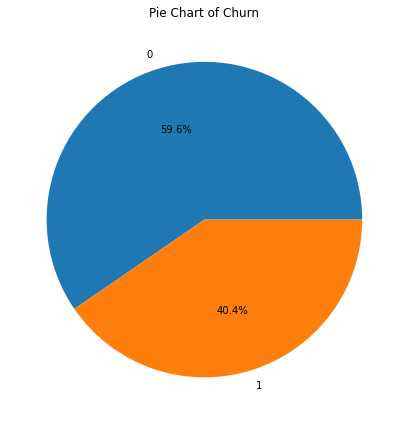

In [23]:
draw_categorical_plot(df['Churn'])

0    50.12
1    49.88
Name: Gender, dtype: float64


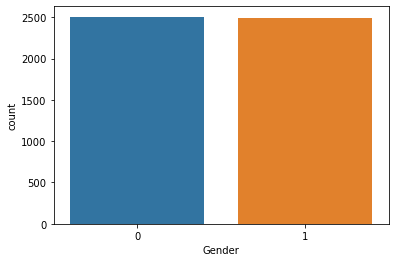

0    34.06
1    33.24
2    32.70
Name: ContractType, dtype: float64


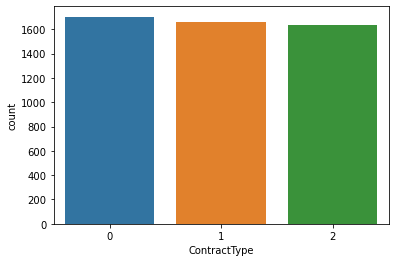

1    50.08
0    49.92
Name: TechSupport, dtype: float64


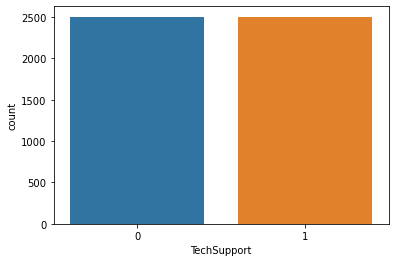

0    35.66
2    33.14
1    31.20
Name: InternetService, dtype: float64


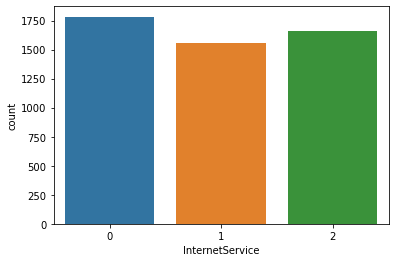

0    50.5
1    49.5
Name: PaperlessBilling, dtype: float64


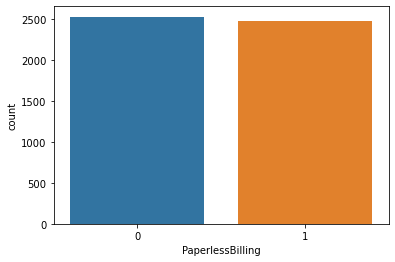

3    25.94
1    25.46
2    24.38
0    24.22
Name: PaymentMethod, dtype: float64


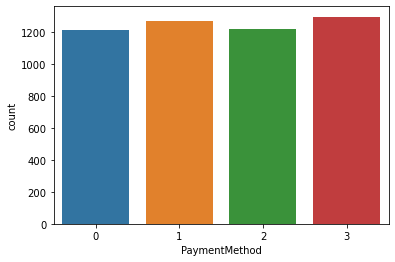

0    59.58
1    40.42
Name: Churn, dtype: float64


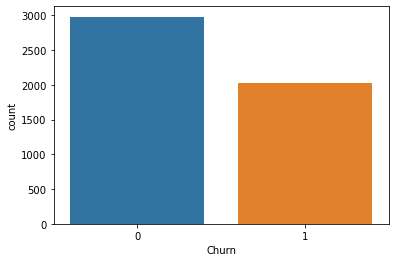

In [24]:
for column in ['Gender', 'ContractType', 'TechSupport', 'InternetService', 'PaperlessBilling', 'PaymentMethod', 'Churn']:
    print(df[column].value_counts(normalize=True) * 100)
    sns.countplot(x=column, data=df)
    plt.show()

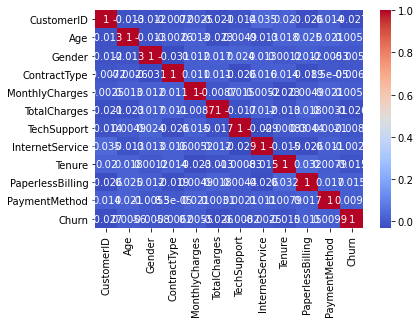

In [25]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

<AxesSubplot:xlabel='ContractType', ylabel='count'>

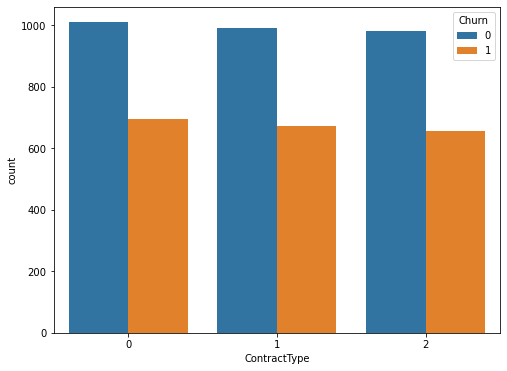

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x = 'ContractType', hue = 'Churn')

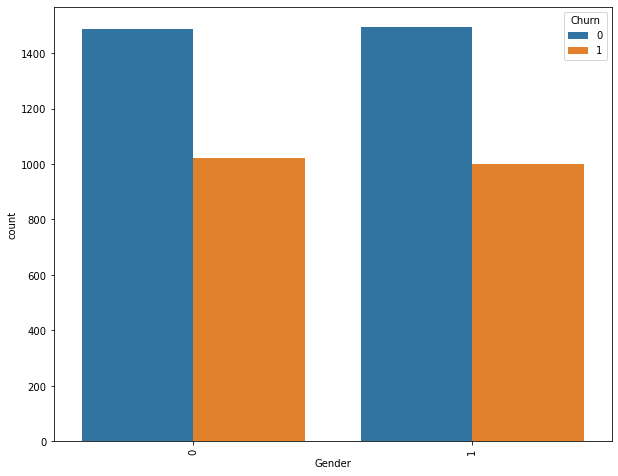

In [27]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Gender', hue='Churn', data=df)
plt.xticks(rotation=90)
plt.show()

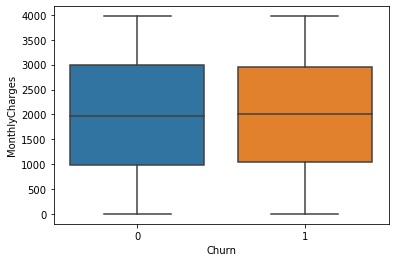

In [28]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.show()

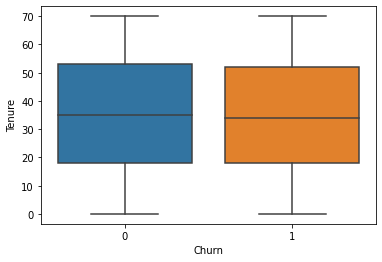

In [29]:
sns.boxplot(x='Churn', y='Tenure', data=df)
plt.show()

#  Feature Engineering

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [72]:
# Feature interactions
X_train_interaction = np.hstack((X_train, (X_train[:, 3].reshape(-1, 1) * X_train[:, 4].reshape(-1, 1))))
X_test_interaction = np.hstack((X_test, (X_test[:, 3].reshape(-1, 1) * X_test[:, 4].reshape(-1, 1))))



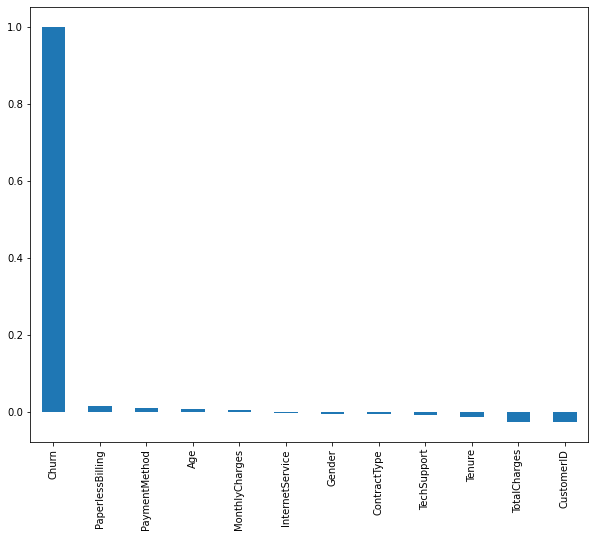

In [73]:
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation
target_corr = numeric_df.corr()['Churn'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
target_corr.plot(kind='bar')
plt.show()

# Model Building

In [74]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

models = {
    'Logistic Regression': LogisticRegression(max_iter=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Random Forest': RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
}

for model_name, model in models.items():
    model.fit(X_train_interaction, y_train)
    y_pred = model.predict(X_test_interaction)
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"ROC AUC: {roc_auc_score(y_test, model.predict_proba(X_test_interaction)[:, 1])}\n")

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       603
           1       0.00      0.00      0.00       397

    accuracy                           0.60      1000
   macro avg       0.30      0.50      0.38      1000
weighted avg       0.36      0.60      0.45      1000

Confusion Matrix:
[[603   0]
 [397   0]]
ROC AUC: 0.4916099602741958

Model: Decision Tree
              precision    recall  f1-score   support

           0       0.59      0.91      0.72       603
           1       0.26      0.05      0.08       397

    accuracy                           0.57      1000
   macro avg       0.43      0.48      0.40      1000
weighted avg       0.46      0.57      0.47      1000

Confusion Matrix:
[[550  53]
 [378  19]]
ROC AUC: 0.46749877814955454



E:\python\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\python\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\python\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: Random Forest
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       603
           1       1.00      0.00      0.01       397

    accuracy                           0.60      1000
   macro avg       0.80      0.50      0.38      1000
weighted avg       0.76      0.60      0.46      1000

Confusion Matrix:
[[603   0]
 [396   1]]
ROC AUC: 0.46612863474399624

Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.60      0.92      0.72       603
           1       0.33      0.06      0.11       397

    accuracy                           0.58      1000
   macro avg       0.47      0.49      0.41      1000
weighted avg       0.49      0.58      0.48      1000

Confusion Matrix:
[[553  50]
 [372  25]]
ROC AUC: 0.4722274438053227



In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print('Training Shape: ', X_train.shape)
print('Testing Shape: ', X_test.shape)

Training Shape:  (4500, 10)
Testing Shape:  (500, 10)


In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LogisticRegression

In [53]:
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
LR = LogisticRegression()
LR.fit(X_train_scaled, y_train_classified)

LogisticRegression()

In [54]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy1 = LR.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy1)

Model Accuracy: 0.58


# RandomForestClassifier

In [55]:
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train_classified)

RandomForestClassifier()

In [56]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy3 = rf.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy3)

Model Accuracy: 0.564


# KNeighborsClassifier

In [57]:
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled, y_train_classified)

KNeighborsClassifier()

In [58]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy5 = KNN.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy5)

Model Accuracy: 0.534


# DecisionTreeClassifier

In [59]:
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train_classified)

DecisionTreeClassifier()

In [60]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy4 = dt.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy4)

Model Accuracy: 0.512


# GradientBoostingClassifier

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
GBC = GradientBoostingClassifier()
GBC.fit(X_train_scaled, y_train_classified)

GradientBoostingClassifier()

In [62]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy6 = GBC.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy6)

Model Accuracy: 0.558


In [64]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy6 = GBC.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy6)

Model Accuracy: 0.558


In [68]:
performance_summary = pd.DataFrame({
    'Model':['LR','RF','KNN','DT','GBC'],
    'ACC':[accuracy1,
           accuracy3,
           accuracy4,
           accuracy5,
           accuracy6
          ]
})
performance_summary

,Model,ACC
0,LR,0.580
1,RF,0.564
2,KNN,0.512
3,DT,0.534
4,GBC,0.558


# Model Selection and Evaluation

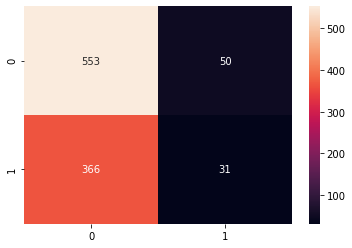

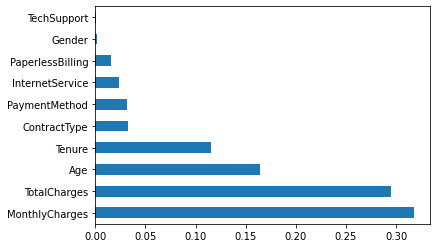

In [76]:
# Select best model based on metrics
best_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)

y_pred_best = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

feature_importance = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.show()
